# Introduction

Dataset taken from https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore.csv

Analysis of Google Play Store App data

All other information available via readme.md

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Read of Google Play Store App Data
play_data = pd.read_csv('googleplaystore.csv')

In [3]:
# Looking at the head of the Play Data
play_data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
# Missing Data Analysis
print("Number of columns is {}".format(play_data.shape[1]))
print("") # Adding a blank line
print("Number of rows is {}".format(play_data.shape[0]))
print("") # Adding a blank line
print(play_data.isnull().sum())

Number of columns is 13

Number of rows is 10841

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [5]:
# Dropping rows with missing data
play_data.dropna(how='any', inplace = True)

print("After dropping rows with missing data the number of rows is {}".format(play_data.shape[0]))

After dropping rows with missing data the number of rows is 9360


# Missing Data Analysis:
* Columns with missing data
    * Rating (13.6%)
    * Type (<0.01%)
    * Content Rating (<0.01%)
    * Current Ver (<0.01%)
    * Android Ver (<0.01%)
* I've dropped any rows with missing data as the main bulk is in 'Ratings' which is an important column for analysis.
* I could have imputed the Ratings values, but I feel this might skew the value for certain columns in later analysis (Category, Free vs Paid, etc.).

# Questions to Analyse:

* I propose the following interactions to be investigated:
    * 1) Number of Installs for Free vs Paid Apps
    * 2) App Ratings for Free vs Paid Apps
    * 3) App Ratings per Category
    
Motivation of business questions: analysis to help inform the decision points that app developers will encounter when choosing which business model to decide between and which category of apps to focus on the development of.

# Data Preprocessing

In [6]:
# Add any data preprocessing required here

# Creating integer column of installs by removing punctuation and casting to int
int_installs = [re.sub(r'[^\w\s]','',i) for i in play_data['Installs']]
int_installs = list(map(int, int_installs))
play_data['int_installs'] = int_installs

# 1) Number of Installs for Free vs Paid Apps

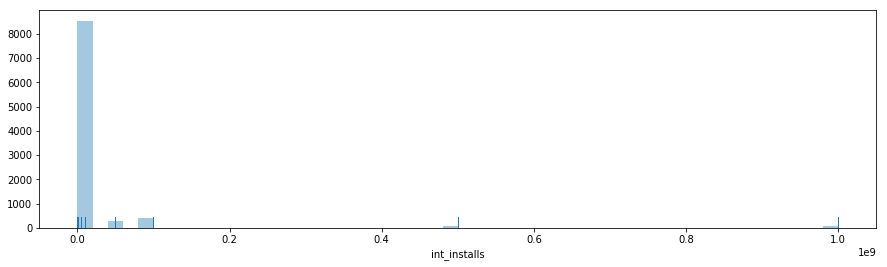

In [7]:
# plt.hist(play_data['int_installs'])
fig, ax = plt.subplots(figsize=(15,4))
sns.distplot(ax=ax, a=play_data['int_installs'], kde=False, rug=True)
# Going to need to log transform this data

Text(0.5,1,'Log Installs for Free vs Paid Apps')

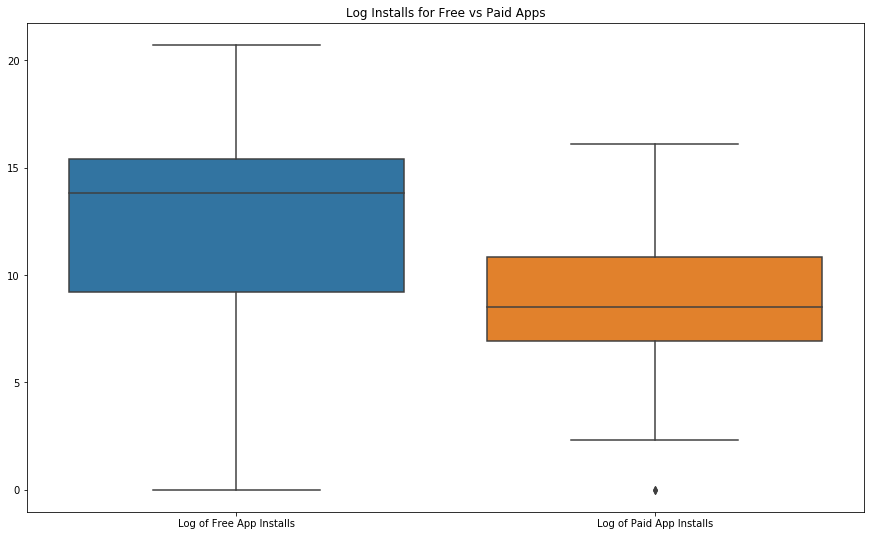

In [31]:
# Pull out paid vs free
free_play_data = play_data.loc[play_data['Price'] == '0']
paid_play_data = play_data.loc[play_data['Price'] != '0']

# Log Transform of Installs
log_free_play_data = free_play_data['int_installs'].apply(np.log)
log_paid_play_data = paid_play_data['int_installs'].apply(np.log)

boxplot_installs_paid_vs_free = [log_free_play_data, log_paid_play_data]

fig, ax = plt.subplots(figsize=(15,9))
sns.boxplot(data=boxplot_installs_paid_vs_free)
ax.set_xticklabels(['Log of Free App Installs', 'Log of Paid App Installs'])
plt.title('Log Installs for Free vs Paid Apps')

# paid_play_data['int_installs'].apply(np.log).hist()

In [9]:
# Summary Statistics of Installs
print("Free App Installs - Summary Statistics")
print("Amount: {:,}".format(len(free_play_data['int_installs'])))
print("Mean: {:,}".format(np.mean(free_play_data['int_installs'])))
print("Min and Max: {:,} and {:,}".format(np.min(free_play_data['int_installs']), np.max(free_play_data['int_installs'])))
print("Standard Deviation: {:,}".format(np.std(free_play_data['int_installs'])))

print()

print("Paid App Installs - Summary Statistics")
print("Amount: {:,}".format(len(paid_play_data['int_installs'])))
print("Mean: {:,}".format(np.mean(paid_play_data['int_installs'])))
print("Min and Max: {:,} and {:,}".format(np.min(paid_play_data['int_installs']), np.max(paid_play_data['int_installs'])))
print("Standard Deviation: {:,}".format(np.std(paid_play_data['int_installs'])))

Free App Installs - Summary Statistics
Amount: 8,715
Mean: 19,225,817.596787147
Min and Max: 1 and 1,000,000,000
Standard Deviation: 94,444,993.25539647

Paid App Installs - Summary Statistics
Amount: 645
Mean: 113,010.20465116279
Min and Max: 1 and 10,000,000
Standard Deviation: 704,121.017949907


# Analyse 1 Findings:

Number of Installs:
Analysis of log transform of install data for paid vs free apps suggests that free app have a significantly larger mean value of installs. Though free apps have a significantly larger amount of variance as shown by the difference in standard deviation between the two values.

# 2) App Ratings for Free vs Paid Apps

Text(0.5,1,'Ratings for Free vs Paid Apps')

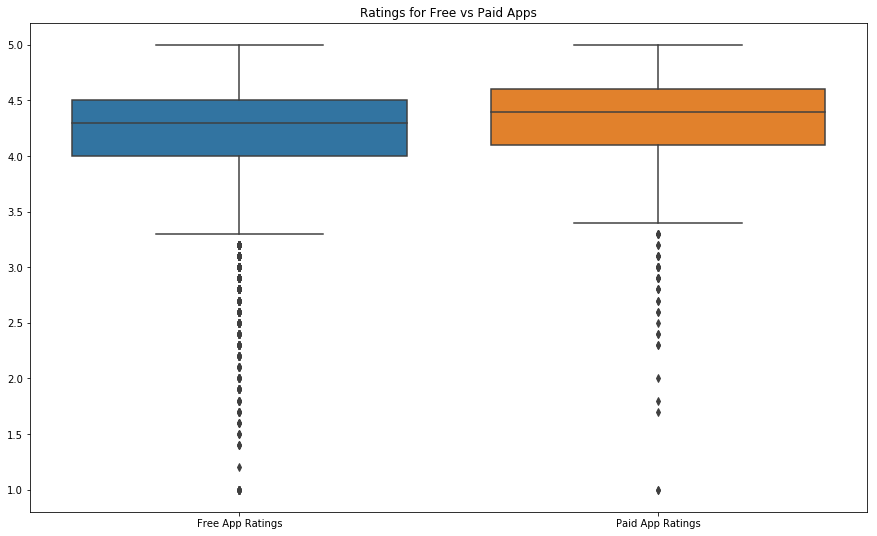

In [32]:
# Boxplot of free vs paid ratings
boxplot_ratings_paid_vs_free = [free_play_data['Rating'], paid_play_data['Rating']]

fig, ax = plt.subplots(figsize=(15,9))
sns.boxplot(data=boxplot_ratings_paid_vs_free)
ax.set_xticklabels(['Free App Ratings', 'Paid App Ratings'])
plt.title('Ratings for Free vs Paid Apps')

(array([  15.,   17.,   39.,   69.,  125.,  415.,  826., 1591., 3909.,
        1709.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

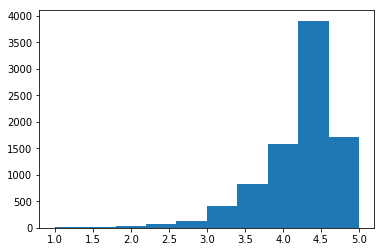

In [59]:
# Free app ratings hist plot
plt.hist(free_play_data['Rating'])

(array([  2.,   1.,   2.,   5.,  12.,  30.,  53.,  69., 263., 208.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

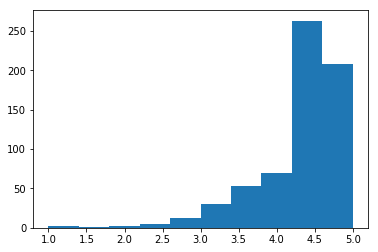

In [60]:
# Paid app ratings hist plot
plt.hist(paid_play_data['Rating'])

In [18]:
# Summary Statistics of Installs
print("Free App Ratings - Summary Statistics")
print("Amount: {:,}".format(len(free_play_data['Rating'])))
print("Mean: {:,}".format(np.mean(free_play_data['Rating'])))
print("Standard Deviation: {:,}".format(np.std(free_play_data['Rating'])))

print()

print("Paid App Ratings - Summary Statistics")
print("Amount: {:,}".format(len(paid_play_data['Rating'])))
print("Mean: {:,}".format(np.mean(paid_play_data['Rating'])))
print("Standard Deviation: {:,}".format(np.std(paid_play_data['Rating'])))

Free App Ratings - Summary Statistics
Amount: 8,715
Mean: 4.186288009179587
Standard Deviation: 0.5123054230463818

Paid App Ratings - Summary Statistics
Amount: 645
Mean: 4.266821705426354
Standard Deviation: 0.5478215978717574


In [19]:
np.mean(play_data['Rating'])

4.191837606837612

### Analyse 2 Findings:

Ratings:
Analysis of Ratings are that paid apps have an on average higher rating and slightly higher variance in Rating number than free apps. Though it's surprising that the overall average ratings for the dataset is 4.19, which is quite high in a 1-5 rating system.

# 3) App Ratings per Category

In [11]:
play_data.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

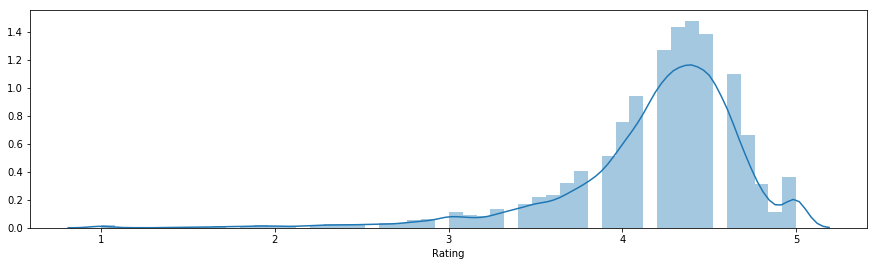

In [12]:
# Looking at the distribution of 'Rating'
fig, ax = plt.subplots(figsize=(15,4))
sns.distplot(ax=ax, a=play_data.Rating)

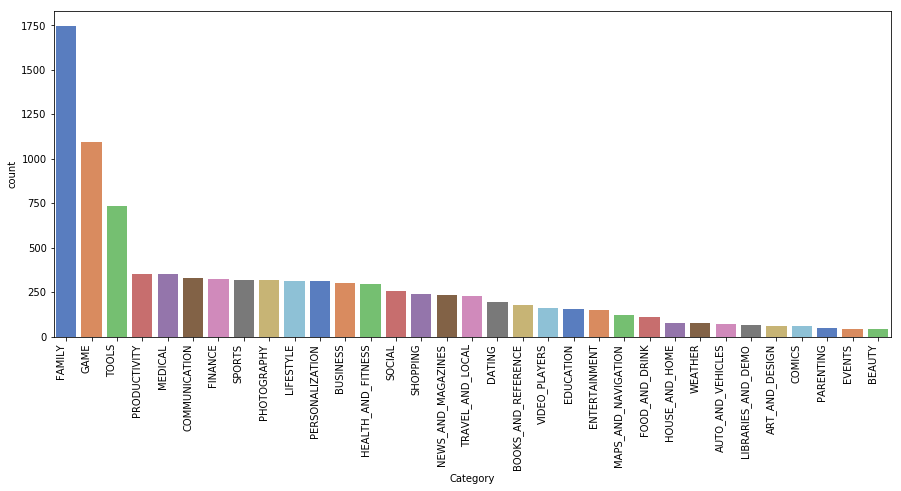

In [61]:
# Looking at the count of 'Category'
fig, ax = plt.subplots(figsize=(15,6))
count_plot = sns.countplot(x="Category",
                           data=play_data,
                           palette = sns.color_palette("muted"),
                           ax=ax,
                          order=play_data['Category'].value_counts().index)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90, ha="right")
count_plot 

([<matplotlib.patches.Wedge at 0x234aab28710>,
 [Text(0.916458,0.608362,'FAMILY'),
  Text(0.0335924,1.09949,'GAME'),
  Text(-0.606207,0.917885,'TOOLS'),
  Text(-0.893163,0.642075,'PRODUCTIVITY'),
  Text(-1.01823,0.416172,'MEDICAL'),
  Text(-1.08587,0.175724,'COMMUNICATION'),
  Text(-1.09815,-0.0638367,'FINANCE'),
  Text(-1.0591,-0.297163,'SPORTS'),
  Text(-0.972107,-0.514788,'PHOTOGRAPHY'),
  Text(-0.842174,-0.707632,'LIFESTYLE'),
  Text(-0.676064,-0.86772,'PERSONALIZATION'),
  Text(-0.483866,-0.987863,'BUSINESS'),
  Text(-0.27649,-1.06468,'HEALTH_AND_FITNESS'),
  Text(-0.0741534,-1.0975,'SOCIAL'),
  Text(0.109105,-1.09458,'SHOPPING'),
  Text(0.280062,-1.06375,'NEWS_AND_MAGAZINES'),
  Text(0.439978,-1.00818,'TRAVEL_AND_LOCAL'),
  Text(0.577579,-0.936164,'DATING'),
  Text(0.689955,-0.856716,'BOOKS_AND_REFERENCE'),
  Text(0.782503,-0.773104,'VIDEO_PLAYERS'),
  Text(0.859719,-0.68621,'EDUCATION'),
  Text(0.925143,-0.595072,'ENTERTAINMENT'),
  Text(0.975712,-0.507923,'MAPS_AND_NAVIGATION')

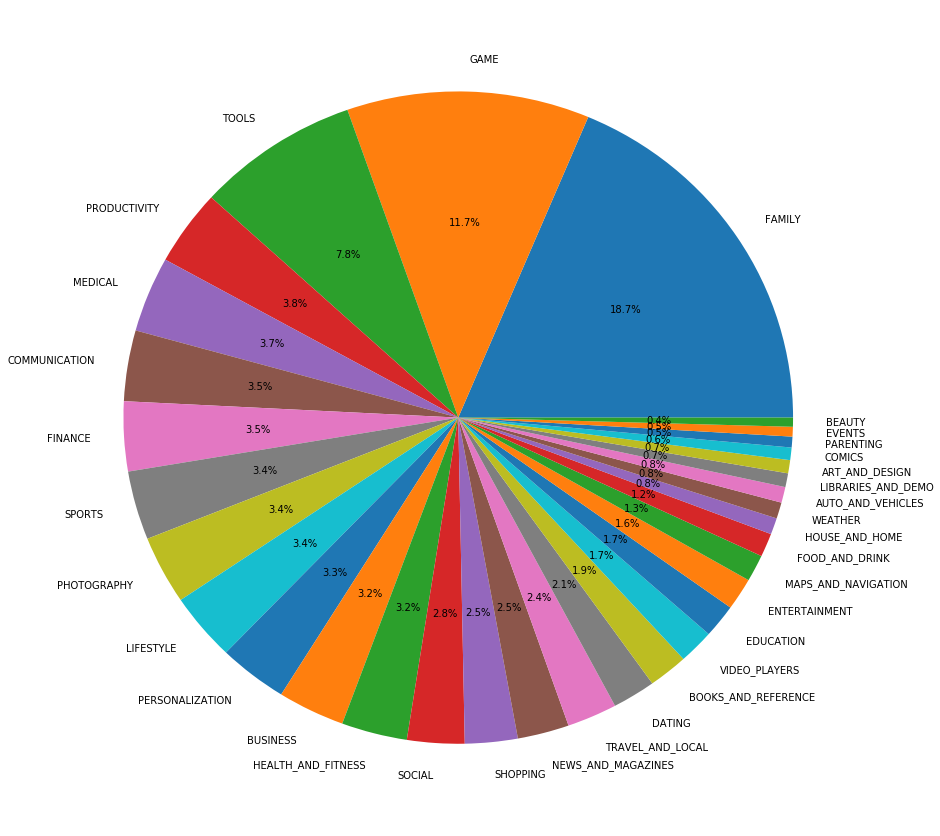

In [57]:
category_counts = pd.DataFrame(play_data['Category'].value_counts(), columns=['Category'])
# category_counts.columns.values
# category_counts.index.values
plt.subplots(figsize=(15,15))
plt.pie(x=category_counts, labels=category_counts.index.values,autopct='%1.1f%%')

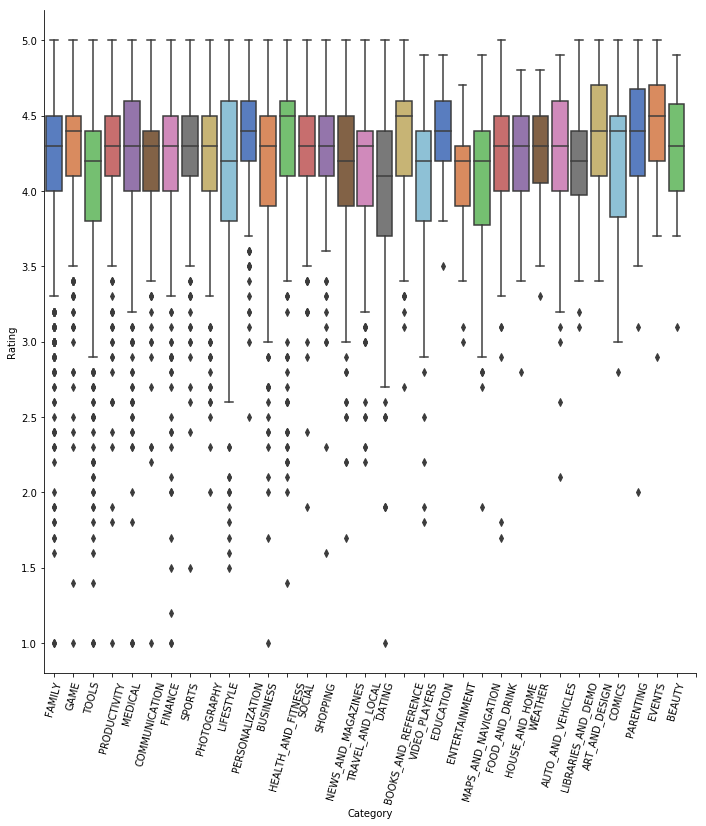

In [64]:
# Boxplot of Ratings vs Categories
cat_plot = sns.catplot(x = "Category",
                       y = "Rating",
                       data = play_data,
                       kind = "box",
                       height = 10,
                       palette = sns.color_palette("muted"),
                       order=play_data['Category'].value_counts().index)
cat_plot.set_xticklabels(rotation = 75)
cat_plot.set(xticks = range(0, 34))
cat_plot = cat_plot.set_ylabels("Rating")

In [23]:
# Getting a table of average ratings per category (sorted)
categories = list(play_data.Category.unique())
average_ratings = []
number_of_vals = []

for cat in categories:
    ratings_for_cat = play_data[play_data.Category == cat]
    average_for_cat = ratings_for_cat.Rating.sum()/len(ratings_for_cat)
    average_ratings.append(average_for_cat)
    number_of_vals.append(len(ratings_for_cat))

average_ratings_df = pd.DataFrame({"Category": categories, "Rating": average_ratings, "Length": number_of_vals})

In [28]:
# Top five apps by rating
top_index = (average_ratings_df.Rating.sort_values(ascending = False)).index.values
top_sorted_average_ratings_df = average_ratings_df.reindex(top_index)
top_sorted_average_ratings_df.iloc[0:3,:]

Category    Rating  Length
10          EVENTS  4.435556      45
8        EDUCATION  4.389032     155
0   ART_AND_DESIGN  4.377049      61

In [29]:
# Bottom five apps by rating
bottom_index = (average_ratings_df.Rating.sort_values(ascending = True)).index.values
bottom_sorted_average_ratings_df = average_ratings_df.reindex(bottom_index)
bottom_sorted_average_ratings_df.iloc[0:3,:]

Category    Rating  Length
7                DATING  3.970769     195
25                TOOLS  4.047203     733
32  MAPS_AND_NAVIGATION  4.051613     124

### Analyse 3 Findings:

Family, Game and Tools most popular app categories within this dataset by volume

When analysing rating the majority of app categories are around the rating mean of 4.19, but some apps differentiate themselves as the most and least popular.

The top three app categories being 'events', 'education' and 'art and design'.

On the other hand, the bottom three app categories are 'dating', 'tools' and 'maps and navigation'

This is interesting as it shows that there is a correlation between rating 'success' and app category, and developers focusing on specific genres.


# Conclusion

From analysis 1 and 2, it appears that although free apps have a higher install rate their rating is on average worse than paid apps. This might be due to paid apps having a higher quality production, but that metric isn't measured within this dataset.

For an app maker it would depend on how they measure success (ratings vs no. of installs) that would guide them in how they should create the business model.

There is  the consideration that there seems to be an industry trend to focus on an advertising supported model, and in that case, according to the results of analysis 1, suggest that putting your app out as free would have the potential to increase the number of users that use your app. Though the variance of the number of installs is significantly wider than the paid app business model.

From analysis 3, it would suggest that although the majority of app categories have a similar rating mean of ~4.2 there are definitely app categories that have an on average higher or lower score. The top rated app categories are: events, education, and art and design apps. The bottom rated app categories are: dating, tools, and maps and navigation. This analysis could potentially focus developers on which categories to focus development in, or at least to look into further analysis for.